## Full raw data

In [2]:
from utils.data_utils import load_raw_data, visualize_map_with_geometry
from pathlib import Path

# Flatten the JSON structure into a DataFrame
df = load_raw_data(Path('../data/MI_raw_data.json'))

In [ ]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt

# Load the dataframe (assuming it's already loaded as `df`)
gdf = gpd.GeoDataFrame(df, geometry=df['geometry'])  # Ensure geometry is parsed

# Step 1: Create grid-like state space
gdf['centroid'] = gdf.geometry.centroid  # Calculate centroids for each county
gdf['grid_x'] = gdf['centroid'].apply(lambda p: round(p.x))
gdf['grid_y'] = gdf['centroid'].apply(lambda p: round(p.y))

# Map counties to grid cells
grid_mapping = {}
for _, row in gdf.iterrows():
    grid_mapping[(row['grid_x'], row['grid_y'])] = row['county']

# Step 2: Validate adjacency
def is_adjacent(county, neighbor_county):
    """Check if two counties are adjacent based on the adjacency list."""
    adjacencies = gdf[gdf['county'] == county]['adj'].values[0]
    return neighbor_county in adjacencies

# Create a dictionary for adjacency checks
grid_adjacency = {}
for (x, y), county in grid_mapping.items():
    # Find all 8 possible neighboring cells
    neighbors = [
        (x - 1, y - 1), (x, y - 1), (x + 1, y - 1),
        (x - 1, y),                 (x + 1, y),
        (x - 1, y + 1), (x, y + 1), (x + 1, y + 1),
    ]
    grid_adjacency[county] = [
        grid_mapping.get(neighbor)
        for neighbor in neighbors
        if grid_mapping.get(neighbor)
    ]

# Verify adjacency consistency
for county, neighbors in grid_adjacency.items():
    for neighbor in neighbors:
        if not is_adjacent(county, neighbor):
            print(f"Adjacency mismatch for {county} and {neighbor}")

# Step 3: Visualize the grid
plt.figure(figsize=(10, 8))
for (x, y), county in grid_mapping.items():
    plt.scatter(x, y, label=county)
    plt.text(x, y, county, fontsize=8, ha='center', va='center')
plt.title("Grid State Space for RL Problem")
plt.xlabel("Grid X")
plt.ylabel("Grid Y")
plt.show()

In [3]:
adjency_mapping = {}

for index, row in enumerate(df.itertuples()):
    adjency_mapping[index] = row.adj

adjency_mapping

{0: [1, 7, 8, 81],
 1: [0, 11, 80, 81],
 2: [9, 10, 11, 1152, 1156, 3158],
 3: [6, 9, 1151, 1153],
 4: [6, 7, 8, 9, 10],
 5: [6],
 6: [3, 4, 5, 8],
 7: [0, 4, 8, 10, 11],
 8: [0, 4, 6, 7],
 9: [2, 3, 4, 10, 1152, 1153],
 10: [2, 4, 7, 9, 11],
 11: [1, 2, 7, 10, 80, 3154, 3155, 3158],
 12: [14, 15, 16, 17, 18, 19, 20, 517],
 13: [18, 1837, 3513, 3520],
 14: [12, 17, 18],
 15: [12, 16, 20, 515, 2243, 2245],
 16: [12, 15, 516, 517],
 17: [12, 14, 18],
 18: [12, 13, 14, 17, 517, 3513, 3514],
 19: [12, 20, 2214, 2243],
 20: [12, 15, 19, 2243],
 21: [22, 23, 24],
 22: [21, 23],
 23: [21, 22, 24, 51, 62, 63],
 24: [21, 23, 51, 62, 64],
 25: [34, 46, 61, 3597, 3611, 3612],
 26: [46, 62, 63, 3593, 3594],
 27: [32, 34, 46, 49, 63],
 28: [29, 30, 42, 58, 1413],
 29: [28, 30, 47, 1413, 1415],
 30: [28, 29, 42, 47],
 31: [59, 60],
 32: [27, 49],
 33: [39, 41, 44, 49, 55, 3217, 3234],
 34: [25, 27, 60],
 35: [36, 54, 56, 137, 1271, 1283, 1284, 1286],
 36: [35, 50, 54, 137],
 37: [49, 51, 55, 63],
 3

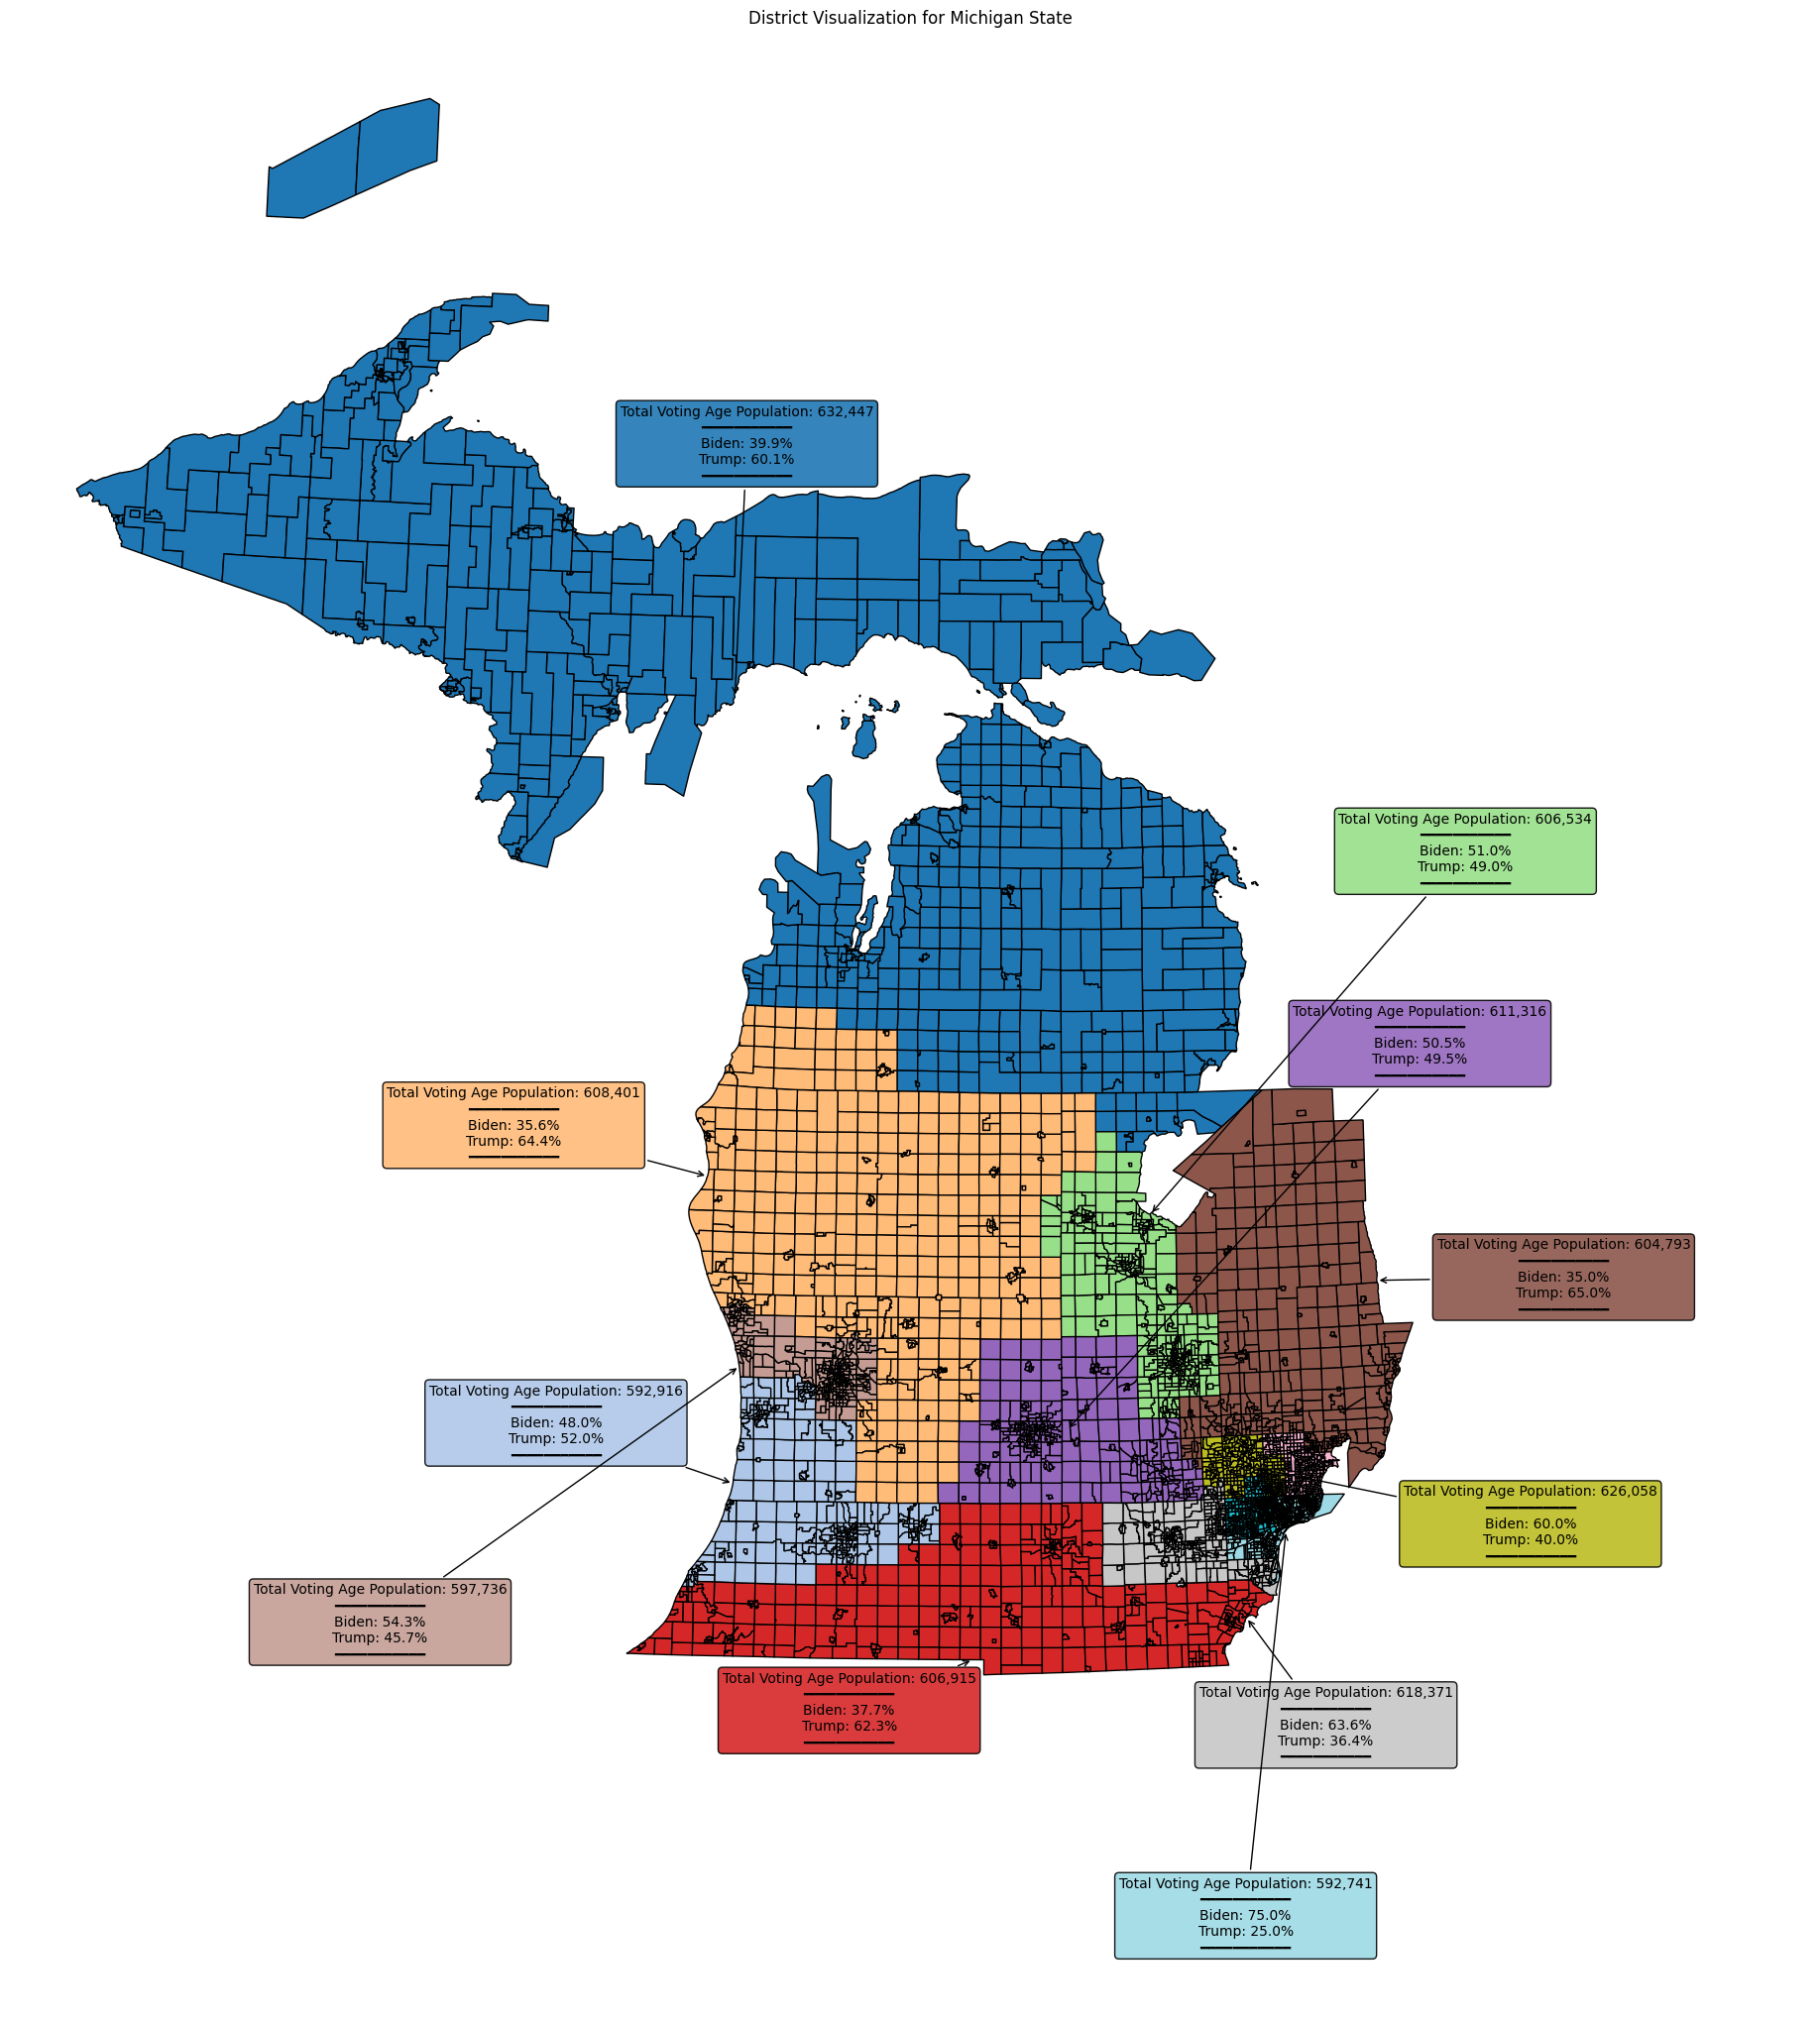

In [5]:
metrics = {
    "total": [("vap", "Voting Age Population")],
    "mean": [],
    "ratio": [[("pre_20_dem_bid", "Biden"), ("pre_20_rep_tru", "Trump")]]
}
visualize_map_with_geometry(df, geometry_col="geometry", district_id_col="cd_2020", state="Michigan", metrics=metrics)

In [ ]:
# largest amount of adjacent nodes:
# max(list(map(len, graph.values())))  # need to make a graph, but it's 8